In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('tweets.csv')
data = data.drop(data.columns[0], axis=1)

In [3]:
data.head()

,Tweets,length,Date,Source,Likes,RTs
0,....Ever since Andrew came to my office to ask...,139,2019-04-28 02:57:32,Twitter for iPhone,7194,2127
1,Thank you to brilliant and highly respected at...,140,2019-04-28 02:57:31,Twitter for iPhone,9009,2445
2,"Thank you Green Bay, Wisconsin! MAKE AMERICA G...",82,2019-04-28 02:07:11,Twitter for iPhone,23730,5836
3,"Beautiful #TrumpRally tonight in Green Bay, Wi...",138,2019-04-28 01:58:39,Twitter for iPhone,24499,7027
4,"Just arrived in Green Bay, Wisconsin for a #MA...",116,2019-04-27 23:46:06,Twitter for iPhone,29999,6423


## 1. Exploratory Data Analysis

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Tweets    200 non-null object
length    200 non-null int64
Date      200 non-null object
Source    200 non-null object
Likes     200 non-null int64
RTs       200 non-null int64
dtypes: int64(3), object(3)
memory usage: 9.5+ KB
None


In [5]:
data['Source'].unique()

array(['Twitter for iPhone', 'Twitter Media Studio'], dtype=object)

In [6]:
# Change the Source to numerical data. 'Twitter for iPhone' as 0, 'Twitter Media Studio' as 1
labels, uniques = pd.factorize(data['Source'])
data['Source'] = labels

In [7]:
data['Source'].groupby(data['Source']).count()

Source
0    193
1      7
Name: Source, dtype: int64

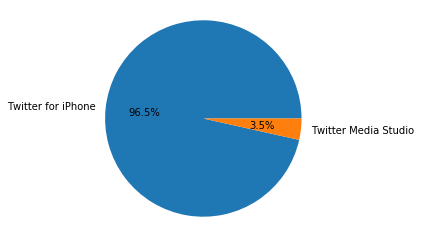

In [8]:
label = 'Twitter for iPhone', 'Twitter Media Studio'
sizes = [193/200, 7/200]
plt.pie(sizes, labels = label, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [9]:
data[['length', 'Source', 'Likes', 'RTs']].describe()

,length,Source,Likes,RTs
count,200.000000,200.000000,200.000000,200.000000
mean,120.700000,0.035000,63062.535000,19412.720000
std,32.549923,0.184241,60686.394602,12062.887373
min,19.000000,0.000000,0.000000,2127.000000
25%,109.500000,0.000000,0.000000,11796.500000
50%,140.000000,0.000000,68734.000000,18077.500000
75%,140.000000,0.000000,101484.500000,24377.750000
max,144.000000,1.000000,400004.000000,116905.000000


### 1.1 Histogram

#### Length

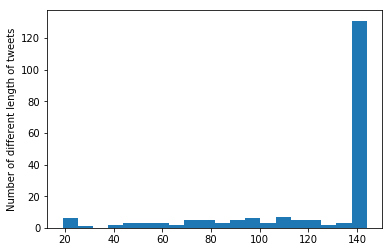

In [10]:
plt.hist(data['length'], bins = 20)
plt.ylabel('Number of different length of tweets')
plt.show()

#### Likes

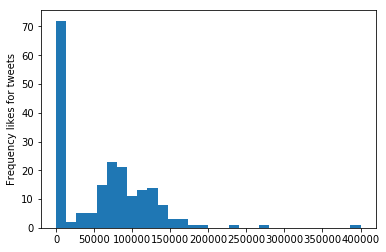

In [13]:
plt.hist(data['Likes'], bins = 30)
plt.ylabel('Frequency likes for tweets')
plt.show()

In [14]:
data.where(data['Likes'] > 400000).dropna()['Tweets']

171    https://t.co/222atp7wuB
Name: Tweets, dtype: object

#### Retweets

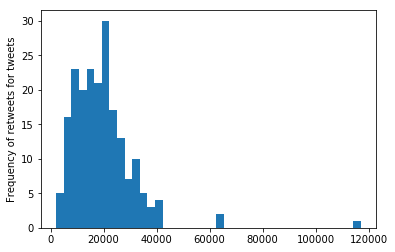

In [15]:
plt.hist(data['RTs'], bins = 40)
plt.ylabel('Frequency of retweets for tweets')
plt.show()

In [16]:
data.where(data['RTs'] > 100000).dropna()['Tweets']

171    https://t.co/222atp7wuB
Name: Tweets, dtype: object

### 1.2 Time Series

In [17]:
timedata = data.copy()

In [18]:
timedata.index = pd.DatetimeIndex(timedata['Date'])

In [19]:
timedata.head()

,Tweets,length,Date,Source,Likes,RTs
Date,,,,,,
2019-04-28 02:57:32,....Ever since Andrew came to my office to ask...,139,2019-04-28 02:57:32,0,7194,2127
2019-04-28 02:57:31,Thank you to brilliant and highly respected at...,140,2019-04-28 02:57:31,0,9009,2445
2019-04-28 02:07:11,"Thank you Green Bay, Wisconsin! MAKE AMERICA G...",82,2019-04-28 02:07:11,0,23730,5836
2019-04-28 01:58:39,"Beautiful #TrumpRally tonight in Green Bay, Wi...",138,2019-04-28 01:58:39,0,24499,7027
2019-04-27 23:46:06,"Just arrived in Green Bay, Wisconsin for a #MA...",116,2019-04-27 23:46:06,0,29999,6423


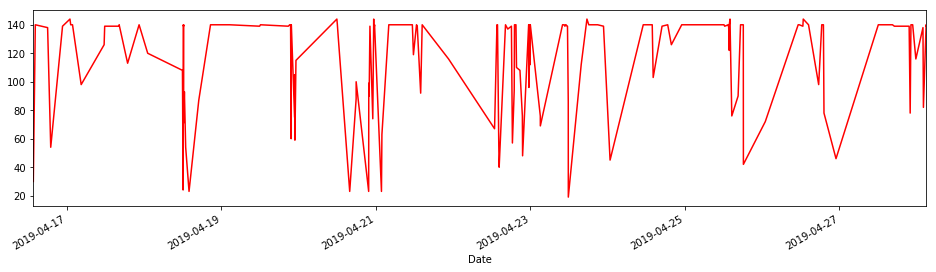

In [20]:
timedata['length'].plot(figsize = (16,4), color='r')

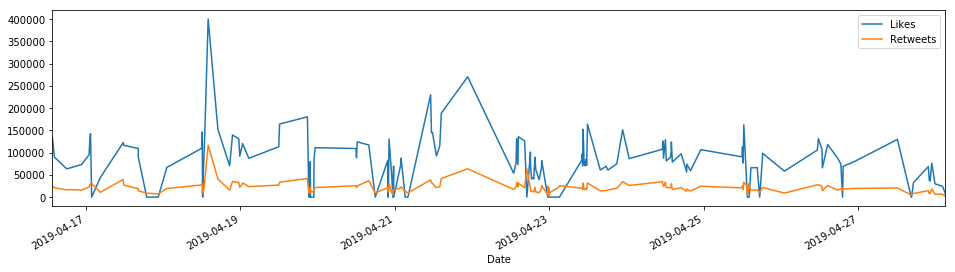

In [21]:
timedata['Likes'].plot(figsize=(16,4), label="Likes", legend=True)
timedata['RTs'].plot(figsize=(16,4), label="Retweets", legend=True);